In [1]:
#Import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
#Read data from csv file
df = pd.read_csv("./Database/Pre_Processed_MSFT.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj. Close,Volume
0,1/4/2010,30.620001,31.100000,30.590000,30.950001,23.431597,38409100
1,1/5/2010,30.850000,31.100000,30.639999,30.959999,23.439156,49749600
2,1/6/2010,30.879999,31.080000,30.520000,30.770000,23.295315,58182400
3,1/7/2010,30.629999,30.700001,30.190001,30.450001,23.053057,50559700
4,1/8/2010,30.280001,30.879999,30.240000,30.660000,23.212034,51197400
5,1/11/2010,30.709999,30.760000,30.120001,30.270000,22.916773,68754700
6,1/12/2010,30.150000,30.400000,29.910000,30.070000,22.765358,65912100
7,1/13/2010,30.260000,30.520000,30.010000,30.350000,22.977345,51863500
8,1/14/2010,30.309999,31.100000,30.260000,30.959999,23.439156,63228100
9,1/15/2010,31.080000,31.240000,30.709999,30.860001,23.363451,79913200


In [67]:
#Drop no-meaning fields
df = df.drop(columns=['Date','Adj. Close'])
df.head(10)

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400
5,30.709999,30.760000,30.120001,30.270000,68754700
6,30.150000,30.400000,29.910000,30.070000,65912100
7,30.260000,30.520000,30.010000,30.350000,51863500
8,30.309999,31.100000,30.260000,30.959999,63228100
9,31.080000,31.240000,30.709999,30.860001,79913200


In [68]:
df

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400
...,...,...,...,...,...
2762,222.690002,225.630005,221.850006,223.940002,22612200
2763,223.110001,223.559998,220.800003,221.020004,18699600
2764,221.419998,223.610001,221.199997,222.750000,10550600
2765,224.449997,226.029999,223.020004,224.960007,17933500


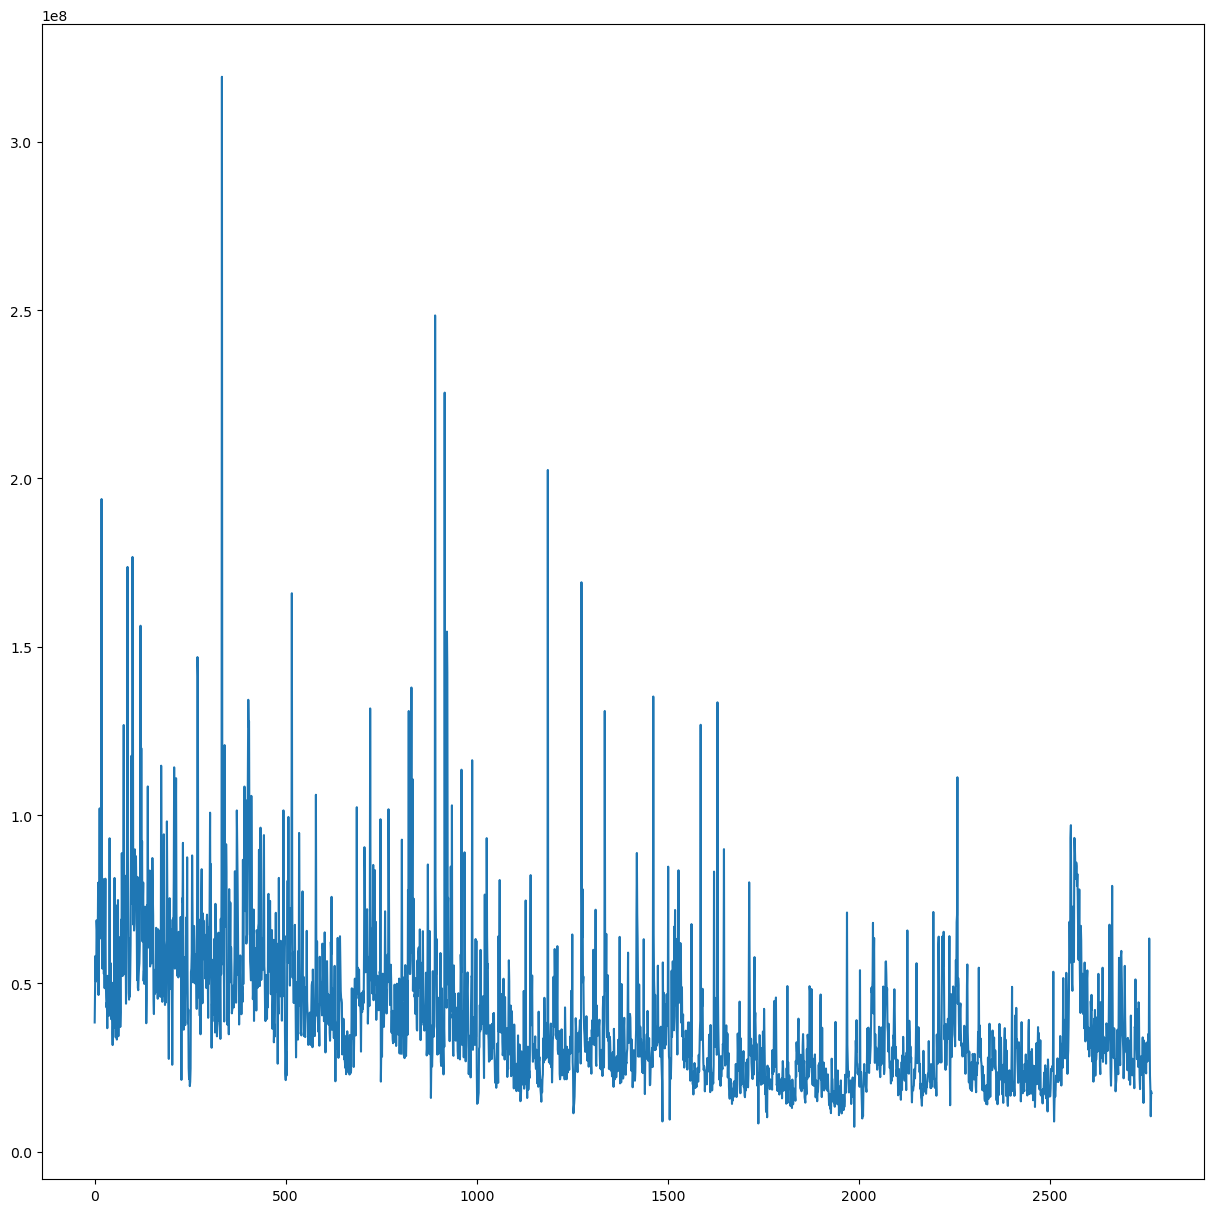

In [69]:
#Visualize volume
plt.figure(figsize=(15,15))
plt.plot(df['Volume'][0:5000])

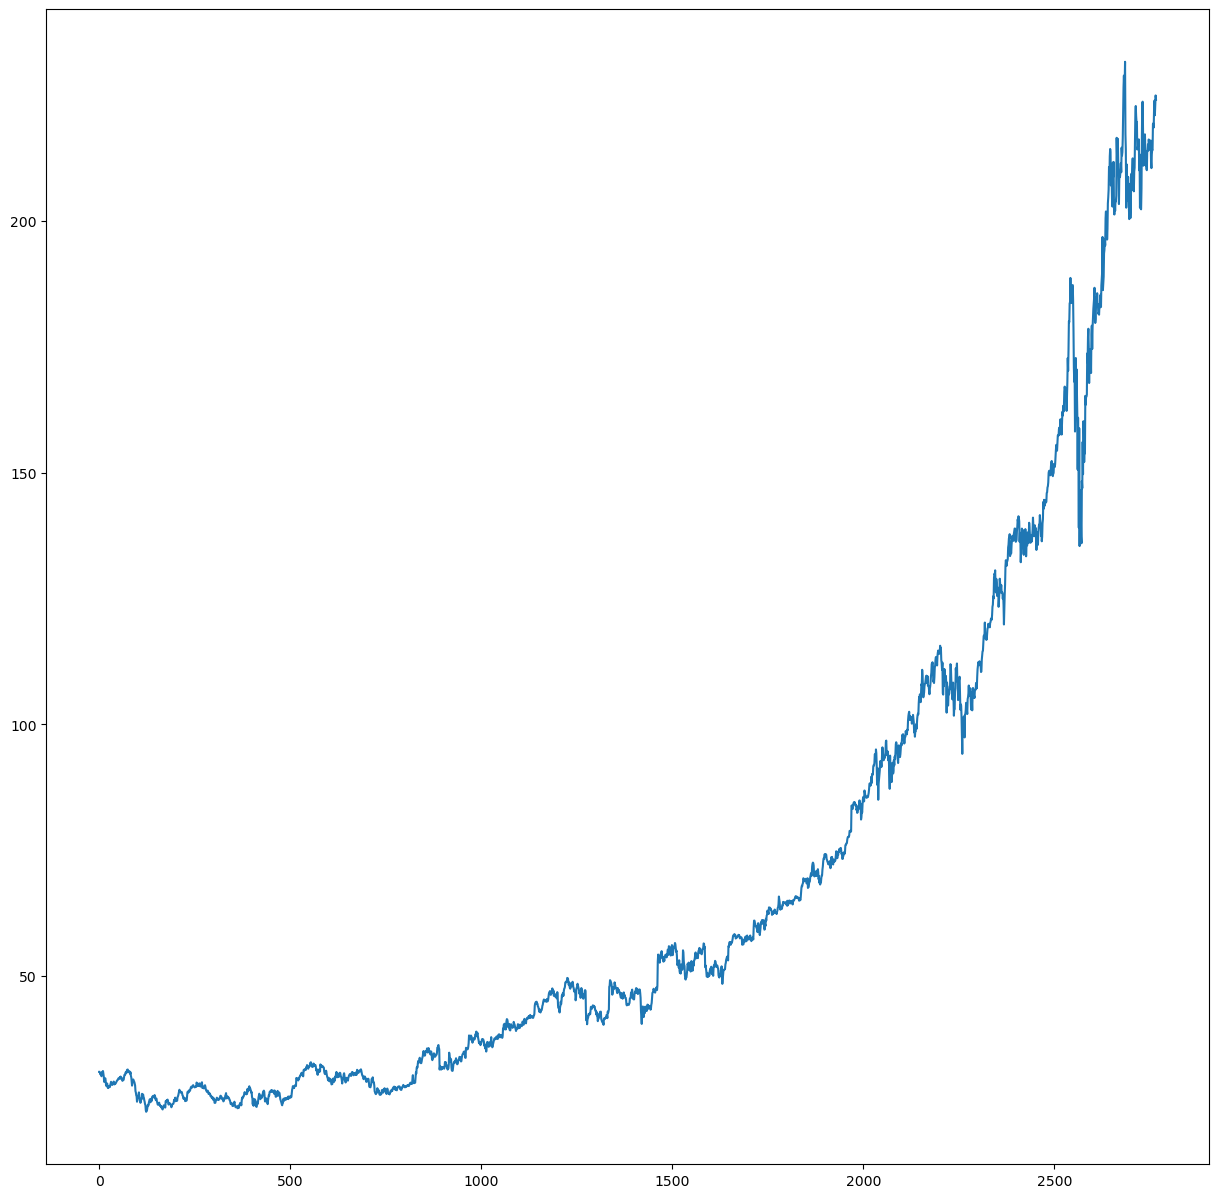

In [86]:
#Visualize close
plt.figure(figsize=(15,15))
plt.plot(df['Close'])

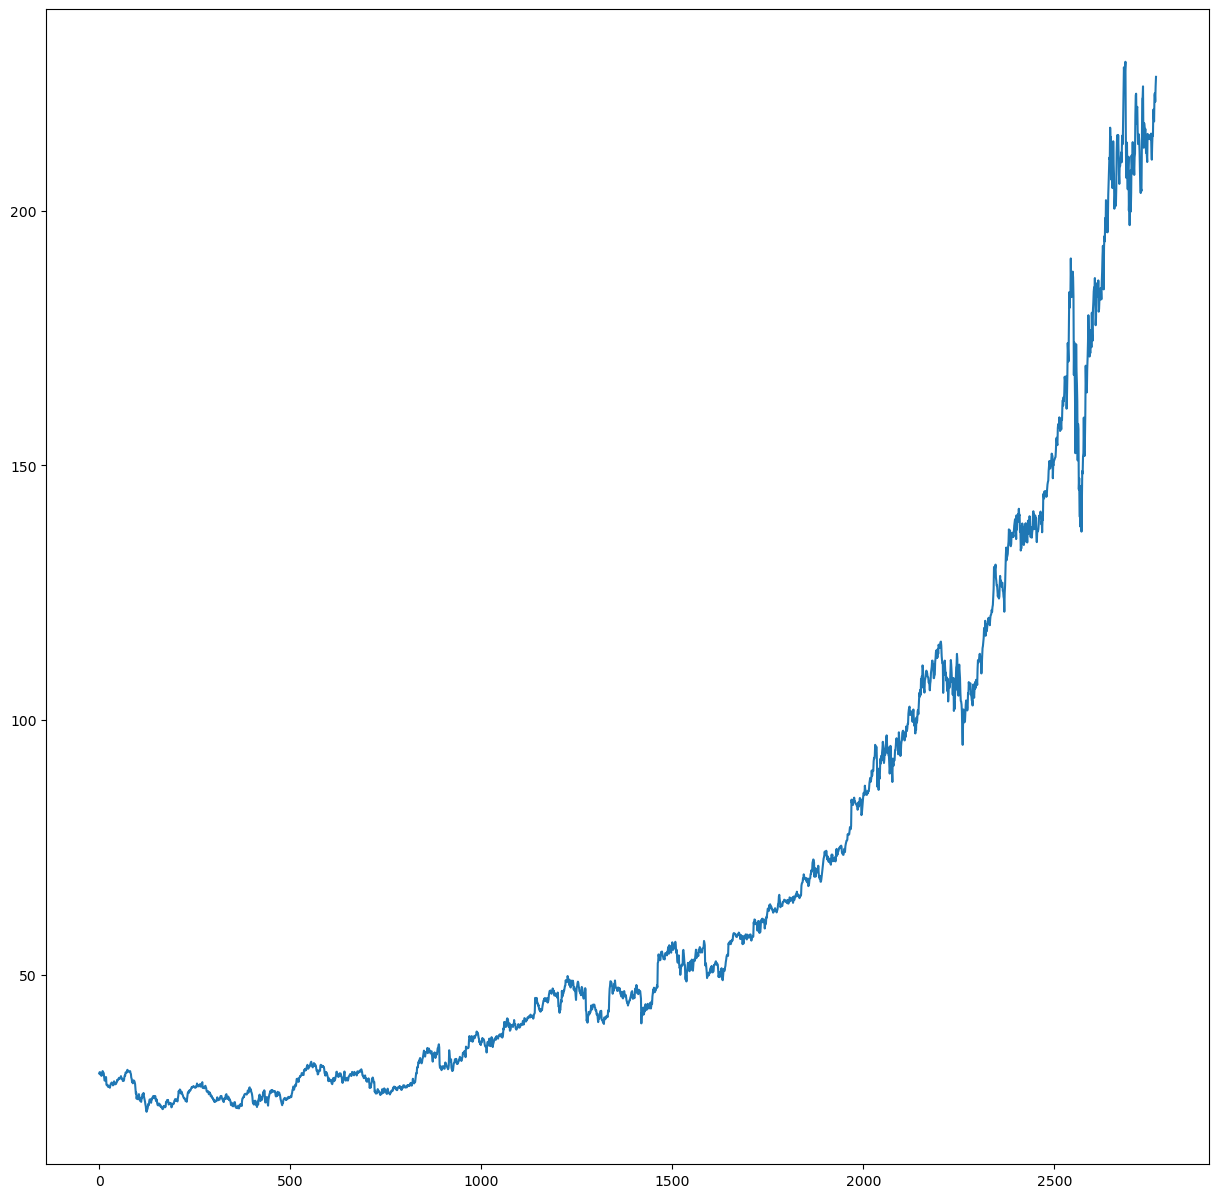

In [87]:
#Visualize Open
plt.figure(figsize=(15,15))
plt.plot(df['Open'])

In [88]:
#Shape of Close data
X_c = df['Close']
print(X_c.shape)

(2767,)


In [89]:
#Scaler to normalization
scaler = MinMaxScaler(feature_range=(0, 1))

def getPastSequenceData(df,timestep):
    X=[]
    y=[]
    p = scaler.fit_transform(np.array(df['Close']).reshape(-1,1)) 
    for i in range(1,len(df)-timestep,timestep):
        vals=np.array(p[i-1:i+timestep-1])
        temp=vals
        X.append(temp)
        y.append(p[i+timestep-1])
    return X,y

In [90]:
#Time step to extract features
time_step = 7

#Get features
X,Y=getPastSequenceData(df,time_step)
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
Y=np.array(Y)

In [91]:
print("After getting features:")
print(X.shape) #features
print(Y.shape) #labels
print(len(X)) #5108/7  #length

After getting features:
(395, 7, 1)
(395, 1)
395


In [92]:
#Spliting data
ntrain = int(len(X)*0.8)

#Train 80% - Test 20%
X_train, X_test = X[0:ntrain], X[ntrain:len(X)]
Y_train, Y_test = Y[0:ntrain], Y[ntrain:len(X)]

#After splitting
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(316, 7, 1) (79, 7, 1)
(316, 1) (79, 1)


In [93]:
for data in X_train:
  print(data)

[[0.03805599]
 [0.03810391]
 [0.03719325]
 [0.03565951]
 [0.03666603]
 [0.03479678]
 [0.03383819]]
[[0.03518022]
 [0.03810391]
 [0.03762462]
 [0.03877493]
 [0.03633052]
 [0.03355061]
 [0.02851802]]
[[0.03024348]
 [0.03110621]
 [0.03192101]
 [0.02947661]
 [0.02477953]
 [0.0258819 ]
 [0.02612154]]
[[0.02693635]
 [0.02314992]
 [0.02401266]
 [0.02257477]
 [0.02396472]
 [0.02386886]
 [0.02449195]]
[[0.02358129]
 [0.02559433]
 [0.02674463]
 [0.02856595]
 [0.02760736]
 [0.02741564]
 [0.02549847]]
[[0.02693635]
 [0.02679256]
 [0.02712807]
 [0.0288056 ]
 [0.02612154]
 [0.02612154]
 [0.02693635]]
[[0.02674463]
 [0.02693635]
 [0.02775115]
 [0.02856595]
 [0.02957247]
 [0.03000384]
 [0.0300997 ]]
[[0.03048313]
 [0.03172929]
 [0.03163344]
 [0.03153758]
 [0.03158551]
 [0.03292753]
 [0.03182515]]
[[0.03355061]
 [0.03187308]
 [0.03153758]
 [0.03240031]
 [0.0300997 ]
 [0.02947661]
 [0.03000384]]
[[0.03024348]
 [0.03038727]
 [0.03311925]
 [0.03513229]
 [0.03503642]
 [0.03565951]
 [0.0374329 ]]
[[0.037672

In [94]:
for data in X_test:
  print(data)

[[0.42173122]
 [0.42034127]
 [0.40974886]
 [0.41051575]
 [0.41516488]
 [0.40783168]
 [0.38012846]]
[[0.40879029]
 [0.40236772]
 [0.38746166]
 [0.38688653]
 [0.40164877]
 [0.39738305]
 [0.39853339]]
[[0.40500386]
 [0.40601037]
 [0.42633245]
 [0.42532593]
 [0.41487731]
 [0.40193637]
 [0.40227188]]
[[0.39282977]
 [0.40390146]
 [0.40874235]
 [0.39115225]
 [0.37720476]
 [0.38391489]
 [0.38372317]]
[[0.40001919]
 [0.40323045]
 [0.42230639]
 [0.41784895]
 [0.421204  ]
 [0.42695552]
 [0.4098447 ]]
[[0.413056  ]
 [0.39211082]
 [0.40538726]
 [0.41018021]
 [0.41252878]
 [0.41430214]
 [0.39791028]]
[[0.38286044]
 [0.38803683]
 [0.38669481]
 [0.37624619]
 [0.36052533]
 [0.34087423]
 [0.37169287]]
[[0.37466451]
 [0.37087807]
 [0.37653375]
 [0.37437694]
 [0.35654718]
 [0.37825921]
 [0.37888228]]
[[0.38242909]
 [0.38947469]
 [0.38626342]
 [0.38242909]
 [0.37883438]
 [0.39302149]
 [0.39479486]]
[[0.39834167]
 [0.40596243]
 [0.39623276]
 [0.40116949]
 [0.39872507]
 [0.40337424]
 [0.393357  ]]
[[0.383100

In [79]:
from keras.layers import Conv1D, Activation,MaxPooling1D,Flatten, GRU, AveragePooling1D, Dense, Dropout
from keras.models import Sequential

#Input các vecto 7X1
# 32*
#Build model
model=Sequential()
#Layer1 
model.add(Conv1D(32, 3, padding='same', input_shape=(time_step,1)))
model.add(Activation('relu'))

#Layer2
model.add(Conv1D(32, 3, padding='same'))
model.add(Activation('relu'))

#layer3 
model.add(AveragePooling1D(pool_size=2))

#layer4
model.add(Conv1D(64, 3, padding='same', input_shape=(time_step,1)))
model.add(Activation('relu'))

#layer5
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))

#layer6
model.add(AveragePooling1D())

#Flatten
model.add(Flatten())
#Output
model.add(Dense(1))

#Summary model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 7, 32)             128       
                                                                 
 activation_8 (Activation)   (None, 7, 32)             0         
                                                                 
 conv1d_9 (Conv1D)           (None, 7, 32)             3104      
                                                                 
 activation_9 (Activation)   (None, 7, 32)             0         
                                                                 
 average_pooling1d_4 (Avera  (None, 3, 32)             0         
 gePooling1D)                                                    
                                                                 
 conv1d_10 (Conv1D)          (None, 3, 64)             6208      
                                                      

In [80]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Call back to save best model
monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="Mystockpred.hdf5", verbose=0, save_best_only=True)

In [81]:
import tensorflow as tf

#Training model - metric MSE
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,Y_train,validation_split=0.2,batch_size = 128, callbacks=[checkpointer],verbose=1,epochs = 512)

Epoch 1/512
2/2 [==============================] - 1s 255ms/step - loss: 0.0067 - val_loss: 0.0653
Epoch 2/512
2/2 [==============================] - 0s 68ms/step - loss: 0.0033 - val_loss: 0.0390
Epoch 3/512
2/2 [==============================] - 0s 54ms/step - loss: 0.0015 - val_loss: 0.0183


C:\Users\Win10\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/512
2/2 [==============================] - 0s 69ms/step - loss: 0.0012 - val_loss: 0.0078
Epoch 5/512
2/2 [==============================] - 0s 54ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 6/512
2/2 [==============================] - 0s 39ms/step - loss: 9.9171e-04 - val_loss: 0.0073
Epoch 7/512
2/2 [==============================] - 0s 40ms/step - loss: 6.3122e-04 - val_loss: 0.0093
Epoch 8/512
2/2 [==============================] - 0s 37ms/step - loss: 5.7023e-04 - val_loss: 0.0082
Epoch 9/512
2/2 [==============================] - 0s 61ms/step - loss: 5.2811e-04 - val_loss: 0.0047
Epoch 10/512
2/2 [==============================] - 0s 53ms/step - loss: 3.0965e-04 - val_loss: 9.1772e-04
Epoch 11/512
2/2 [==============================] - 0s 67ms/step - loss: 1.1474e-04 - val_loss: 1.8436e-04
Epoch 12/512
2/2 [==============================] - 0s 36ms/step - loss: 1.4072e-04 - val_loss: 0.0013
Epoch 13/512
2/2 [==============================] - 0s 40ms/step - loss: 1.5361

2/2 [==============================] - 0s 35ms/step - loss: 2.3730e-05 - val_loss: 8.1537e-05
Epoch 82/512
2/2 [==============================] - 0s 35ms/step - loss: 2.3763e-05 - val_loss: 7.9168e-05
Epoch 83/512
2/2 [==============================] - 0s 34ms/step - loss: 2.3916e-05 - val_loss: 7.3493e-05
Epoch 84/512
2/2 [==============================] - 0s 34ms/step - loss: 2.3711e-05 - val_loss: 8.2558e-05
Epoch 85/512
2/2 [==============================] - 0s 34ms/step - loss: 2.3614e-05 - val_loss: 7.8936e-05
Epoch 86/512
2/2 [==============================] - 0s 38ms/step - loss: 2.3742e-05 - val_loss: 7.1294e-05
Epoch 87/512
2/2 [==============================] - 0s 41ms/step - loss: 2.3670e-05 - val_loss: 7.9195e-05
Epoch 88/512
2/2 [==============================] - 0s 41ms/step - loss: 2.3465e-05 - val_loss: 9.1146e-05
Epoch 89/512
2/2 [==============================] - 0s 37ms/step - loss: 2.3867e-05 - val_loss: 7.5437e-05
Epoch 90/512
2/2 [==============================] 

Epoch 233/512
2/2 [==============================] - 0s 38ms/step - loss: 1.7240e-05 - val_loss: 5.9402e-05
Epoch 234/512
2/2 [==============================] - 0s 37ms/step - loss: 1.6263e-05 - val_loss: 6.0902e-05
Epoch 235/512
2/2 [==============================] - 0s 38ms/step - loss: 1.5916e-05 - val_loss: 9.1769e-05
Epoch 236/512
2/2 [==============================] - 0s 41ms/step - loss: 1.6083e-05 - val_loss: 5.5371e-05
Epoch 237/512
2/2 [==============================] - 0s 56ms/step - loss: 1.6438e-05 - val_loss: 7.4896e-05
Epoch 238/512
2/2 [==============================] - 0s 42ms/step - loss: 1.5837e-05 - val_loss: 5.9283e-05
Epoch 239/512
2/2 [==============================] - 0s 34ms/step - loss: 1.5552e-05 - val_loss: 7.9393e-05
Epoch 240/512
2/2 [==============================] - 0s 34ms/step - loss: 1.5999e-05 - val_loss: 6.4217e-05
Epoch 241/512
2/2 [==============================] - 0s 32ms/step - loss: 1.6243e-05 - val_loss: 7.0203e-05
Epoch 242/512
2/2 [=========

Epoch 309/512
2/2 [==============================] - 0s 39ms/step - loss: 1.3465e-05 - val_loss: 9.1840e-05
Epoch 310/512
2/2 [==============================] - 0s 35ms/step - loss: 1.3543e-05 - val_loss: 6.3520e-05
Epoch 311/512
2/2 [==============================] - 0s 35ms/step - loss: 1.2793e-05 - val_loss: 8.0807e-05
Epoch 312/512
2/2 [==============================] - 0s 33ms/step - loss: 1.2553e-05 - val_loss: 8.9524e-05
Epoch 313/512
2/2 [==============================] - 0s 33ms/step - loss: 1.3325e-05 - val_loss: 7.2793e-05
Epoch 314/512
2/2 [==============================] - 0s 33ms/step - loss: 1.2045e-05 - val_loss: 9.0462e-05
Epoch 315/512
2/2 [==============================] - 0s 36ms/step - loss: 1.2166e-05 - val_loss: 6.9182e-05
Epoch 316/512
2/2 [==============================] - 0s 38ms/step - loss: 1.2398e-05 - val_loss: 7.3415e-05
Epoch 317/512
2/2 [==============================] - 0s 40ms/step - loss: 1.1899e-05 - val_loss: 6.5202e-05
Epoch 318/512
2/2 [=========

Epoch 385/512
2/2 [==============================] - 0s 33ms/step - loss: 1.0290e-05 - val_loss: 7.8953e-05
Epoch 386/512
2/2 [==============================] - 0s 33ms/step - loss: 1.0199e-05 - val_loss: 6.2023e-05
Epoch 387/512
2/2 [==============================] - 0s 32ms/step - loss: 1.0268e-05 - val_loss: 1.1210e-04
Epoch 388/512
2/2 [==============================] - 0s 35ms/step - loss: 1.1150e-05 - val_loss: 6.0225e-05
Epoch 389/512
2/2 [==============================] - 0s 33ms/step - loss: 1.0493e-05 - val_loss: 7.4098e-05
Epoch 390/512
2/2 [==============================] - 0s 33ms/step - loss: 1.0144e-05 - val_loss: 6.2417e-05
Epoch 391/512
2/2 [==============================] - 0s 35ms/step - loss: 1.1188e-05 - val_loss: 7.2213e-05
Epoch 392/512
2/2 [==============================] - 0s 33ms/step - loss: 1.0269e-05 - val_loss: 7.7669e-05
Epoch 393/512
2/2 [==============================] - 0s 38ms/step - loss: 1.0530e-05 - val_loss: 5.0514e-05
Epoch 394/512
2/2 [=========

Epoch 461/512
2/2 [==============================] - 0s 64ms/step - loss: 1.4533e-05 - val_loss: 3.1932e-05
Epoch 462/512
2/2 [==============================] - 0s 35ms/step - loss: 1.2888e-05 - val_loss: 1.1322e-04
Epoch 463/512
2/2 [==============================] - 0s 35ms/step - loss: 1.1172e-05 - val_loss: 3.9997e-05
Epoch 464/512
2/2 [==============================] - 0s 33ms/step - loss: 1.0920e-05 - val_loss: 1.8054e-04
Epoch 465/512
2/2 [==============================] - 0s 35ms/step - loss: 1.3073e-05 - val_loss: 3.5194e-05
Epoch 466/512
2/2 [==============================] - 0s 34ms/step - loss: 1.3226e-05 - val_loss: 1.6055e-04
Epoch 467/512
2/2 [==============================] - 0s 58ms/step - loss: 1.3858e-05 - val_loss: 3.1892e-05
Epoch 468/512
2/2 [==============================] - 0s 32ms/step - loss: 1.4316e-05 - val_loss: 1.4063e-04
Epoch 469/512
2/2 [==============================] - 0s 35ms/step - loss: 1.1127e-05 - val_loss: 5.8853e-05
Epoch 470/512
2/2 [=========

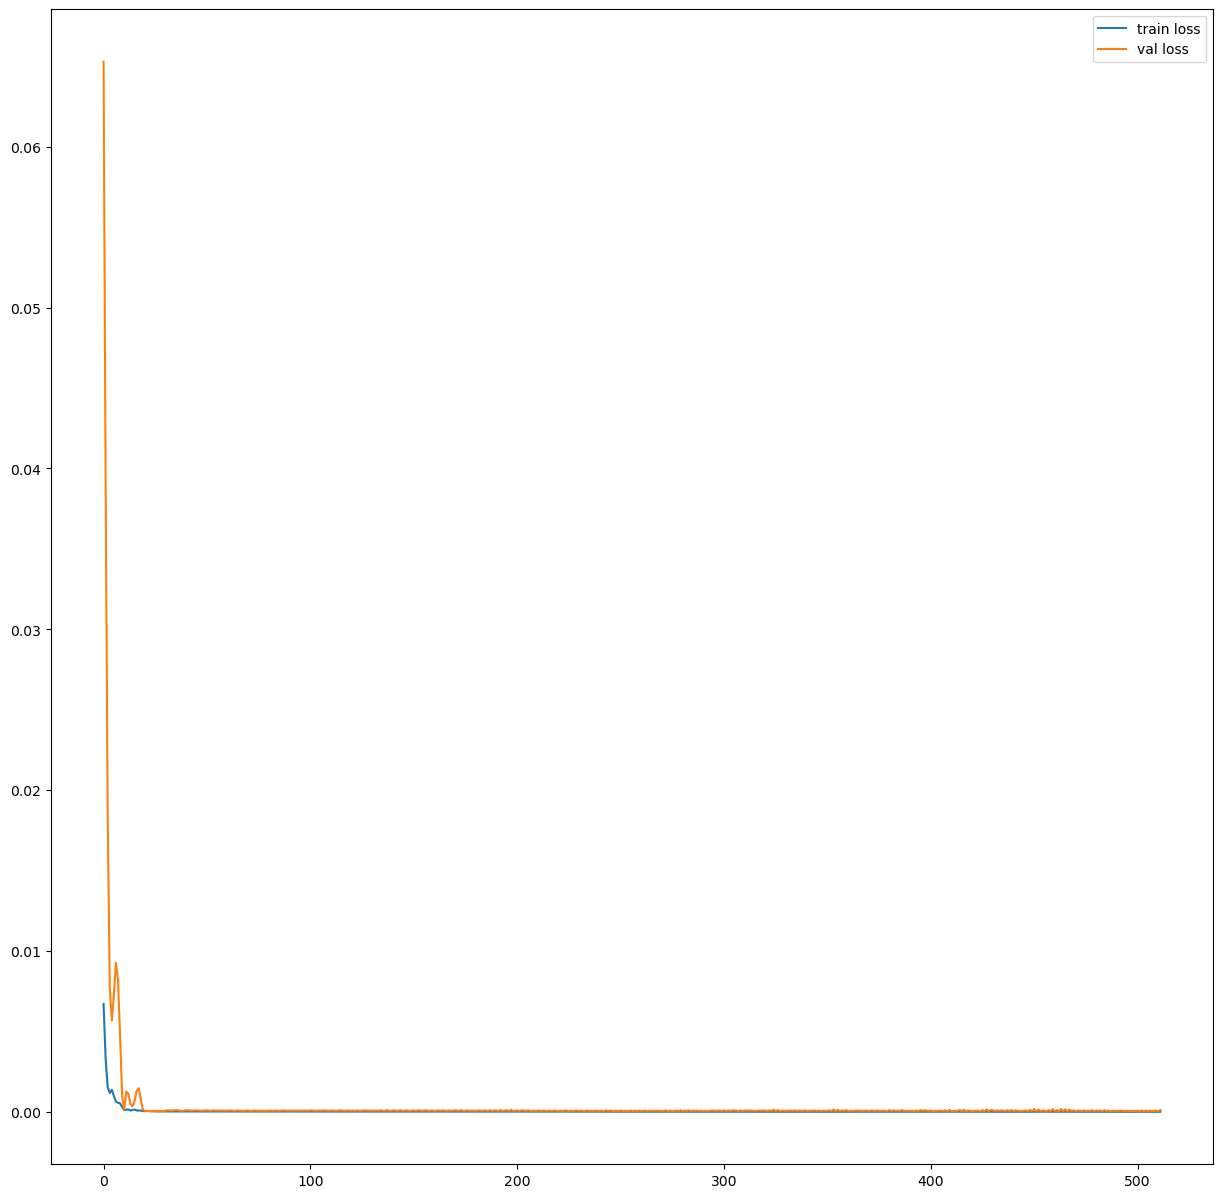

In [82]:
#Draw chart of train and valid loss
plt.figure(figsize=(15,15))
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()

In [53]:
import math
from sklearn.metrics import mean_squared_error

#make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test) #20%

#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(Y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(Y_test)

2/2 [==============================] - 0s 0s/step


Average Training Difference: 1.41 
Average Testing Difference: 5.68 


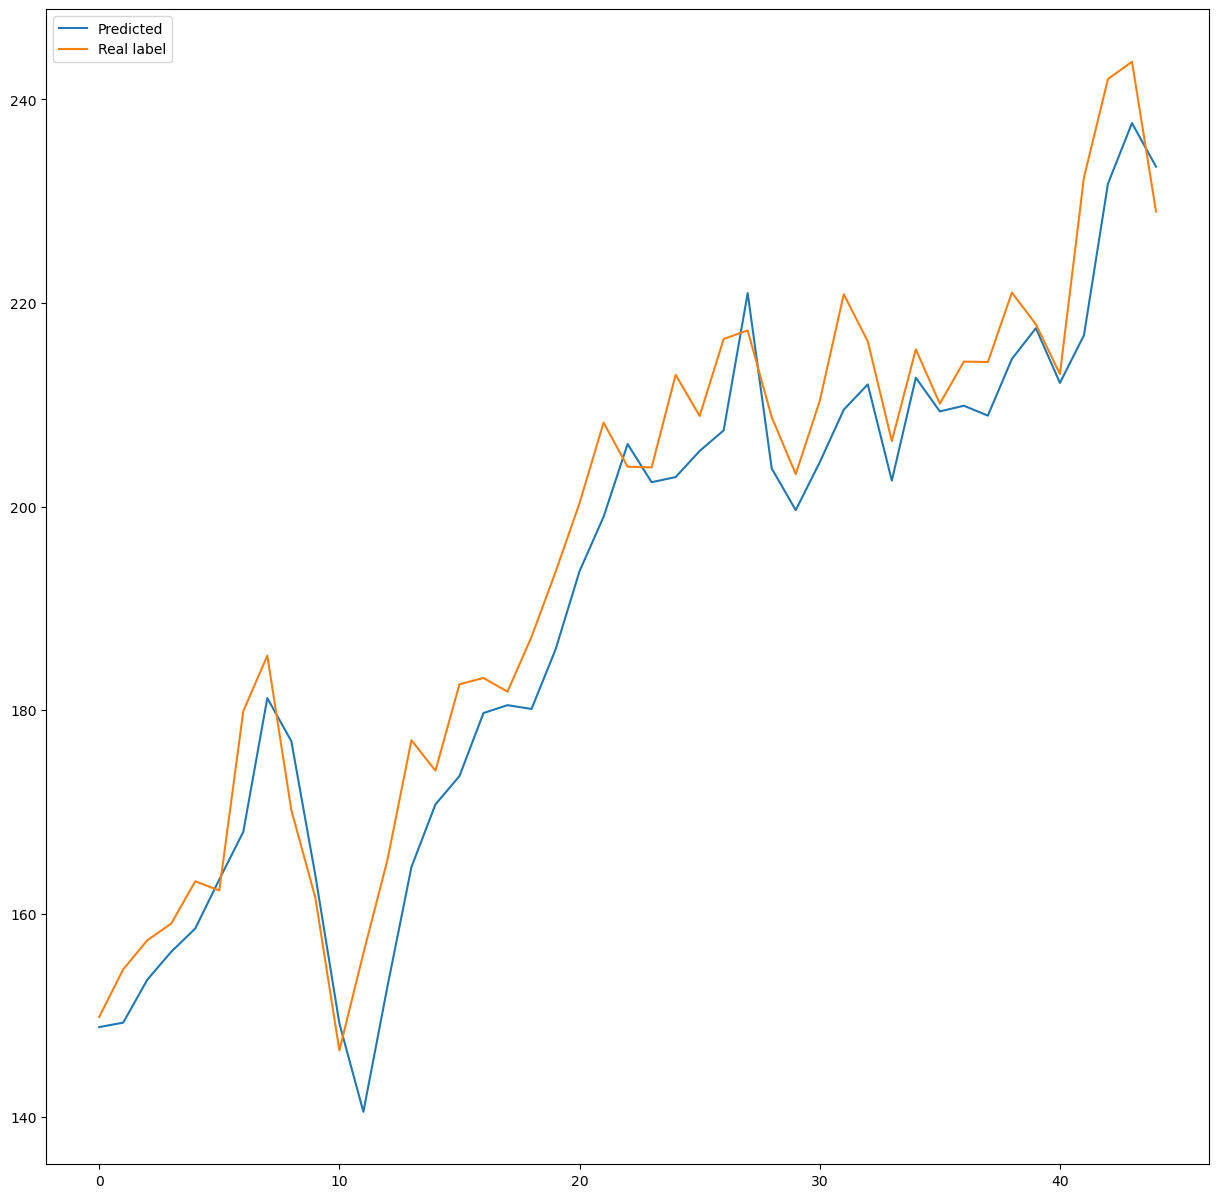

In [54]:
trainScore=0
testScore=0

#calculate root mean squared error
for i in range (trainY.shape[0]):
    trainScore += math.sqrt(mean_squared_error(trainY[i], trainPredict[i]))
trainScore=trainScore/trainY.shape[0]

for i in range (testY.shape[0]):
    testScore += math.sqrt(mean_squared_error(testY[i],testPredict[i]))
testScore=testScore/testY.shape[0]

#MSE score
print('Average Training Difference: %.2f ' % (trainScore))
print('Average Testing Difference: %.2f ' % (testScore))

#Draw prediction and comparing with real labels
plt.figure(figsize=(15,15))
plt.plot(testPredict, label = 'Predicted')
plt.plot(testY, label = 'Real label')
plt.legend()
plt.show()

In [55]:
#Examaple:
a = np.array([[900],[910],[911],[1102],[1156],[1129],[1160]])
#7 ngày

a = scaler.fit_transform(a[:])
a = np.reshape(a,(1,7,1))
aP = model.predict(a)

# invert predictions
aP = scaler.inverse_transform(aP)
print("Predicted: ", aP)

1/1 [==============================] - 0s 16ms/step
Predicted:  [[1052.8907]]


In [83]:
print(testPredict)

[[148.85829]
 [149.29218]
 [153.5008 ]
 [156.26152]
 [158.54094]
 [163.3584 ]
 [168.04163]
 [181.18338]
 [176.94771]
 [163.76143]
 [149.21931]
 [140.53648]
 [152.825  ]
 [164.57532]
 [170.73978]
 [173.5168 ]
 [179.71341]
 [180.48508]
 [180.1133 ]
 [185.95203]
 [193.65096]
 [198.99088]
 [206.13959]
 [202.39412]
 [202.89343]
 [205.46103]
 [207.48567]
 [220.97308]
 [203.74829]
 [199.64824]
 [204.34744]
 [209.5164 ]
 [212.00246]
 [202.55058]
 [212.65854]
 [209.34717]
 [209.90602]
 [208.9346 ]
 [214.5047 ]
 [217.52908]
 [212.14763]
 [216.83093]
 [231.72386]
 [237.67815]
 [233.39555]]


In [84]:
print(len(testY))

45


In [85]:
a = np.arange(0,45)
a = np.asarray(a, dtype=np.int64).reshape((-1,1))
b = testY
print(b.shape)
a = np.concatenate((a,b), axis=1)
a = np.concatenate((a,testPredict), axis=1)
myresult = pd.DataFrame(a, columns=["Week", "Price","Prediction Price"])

(45, 1)


In [59]:
myresult

,Week,Price,Prediction Price
0,0.0,149.85,148.858292
1,1.0,154.53,149.292175
2,2.0,157.38,153.500793
3,3.0,159.03,156.261520
4,4.0,163.18,158.540939
5,5.0,162.28,163.358398
6,6.0,179.90,168.041626
7,7.0,185.35,181.183380
8,8.0,170.17,176.947708
9,9.0,161.57,163.761429


In [60]:
# Saving result
myresult.to_csv("MSFT_Prediction.csv", index=False)

7/7 [==============================] - 0s 3ms/step
221
Average All dataset Difference: 2.89 


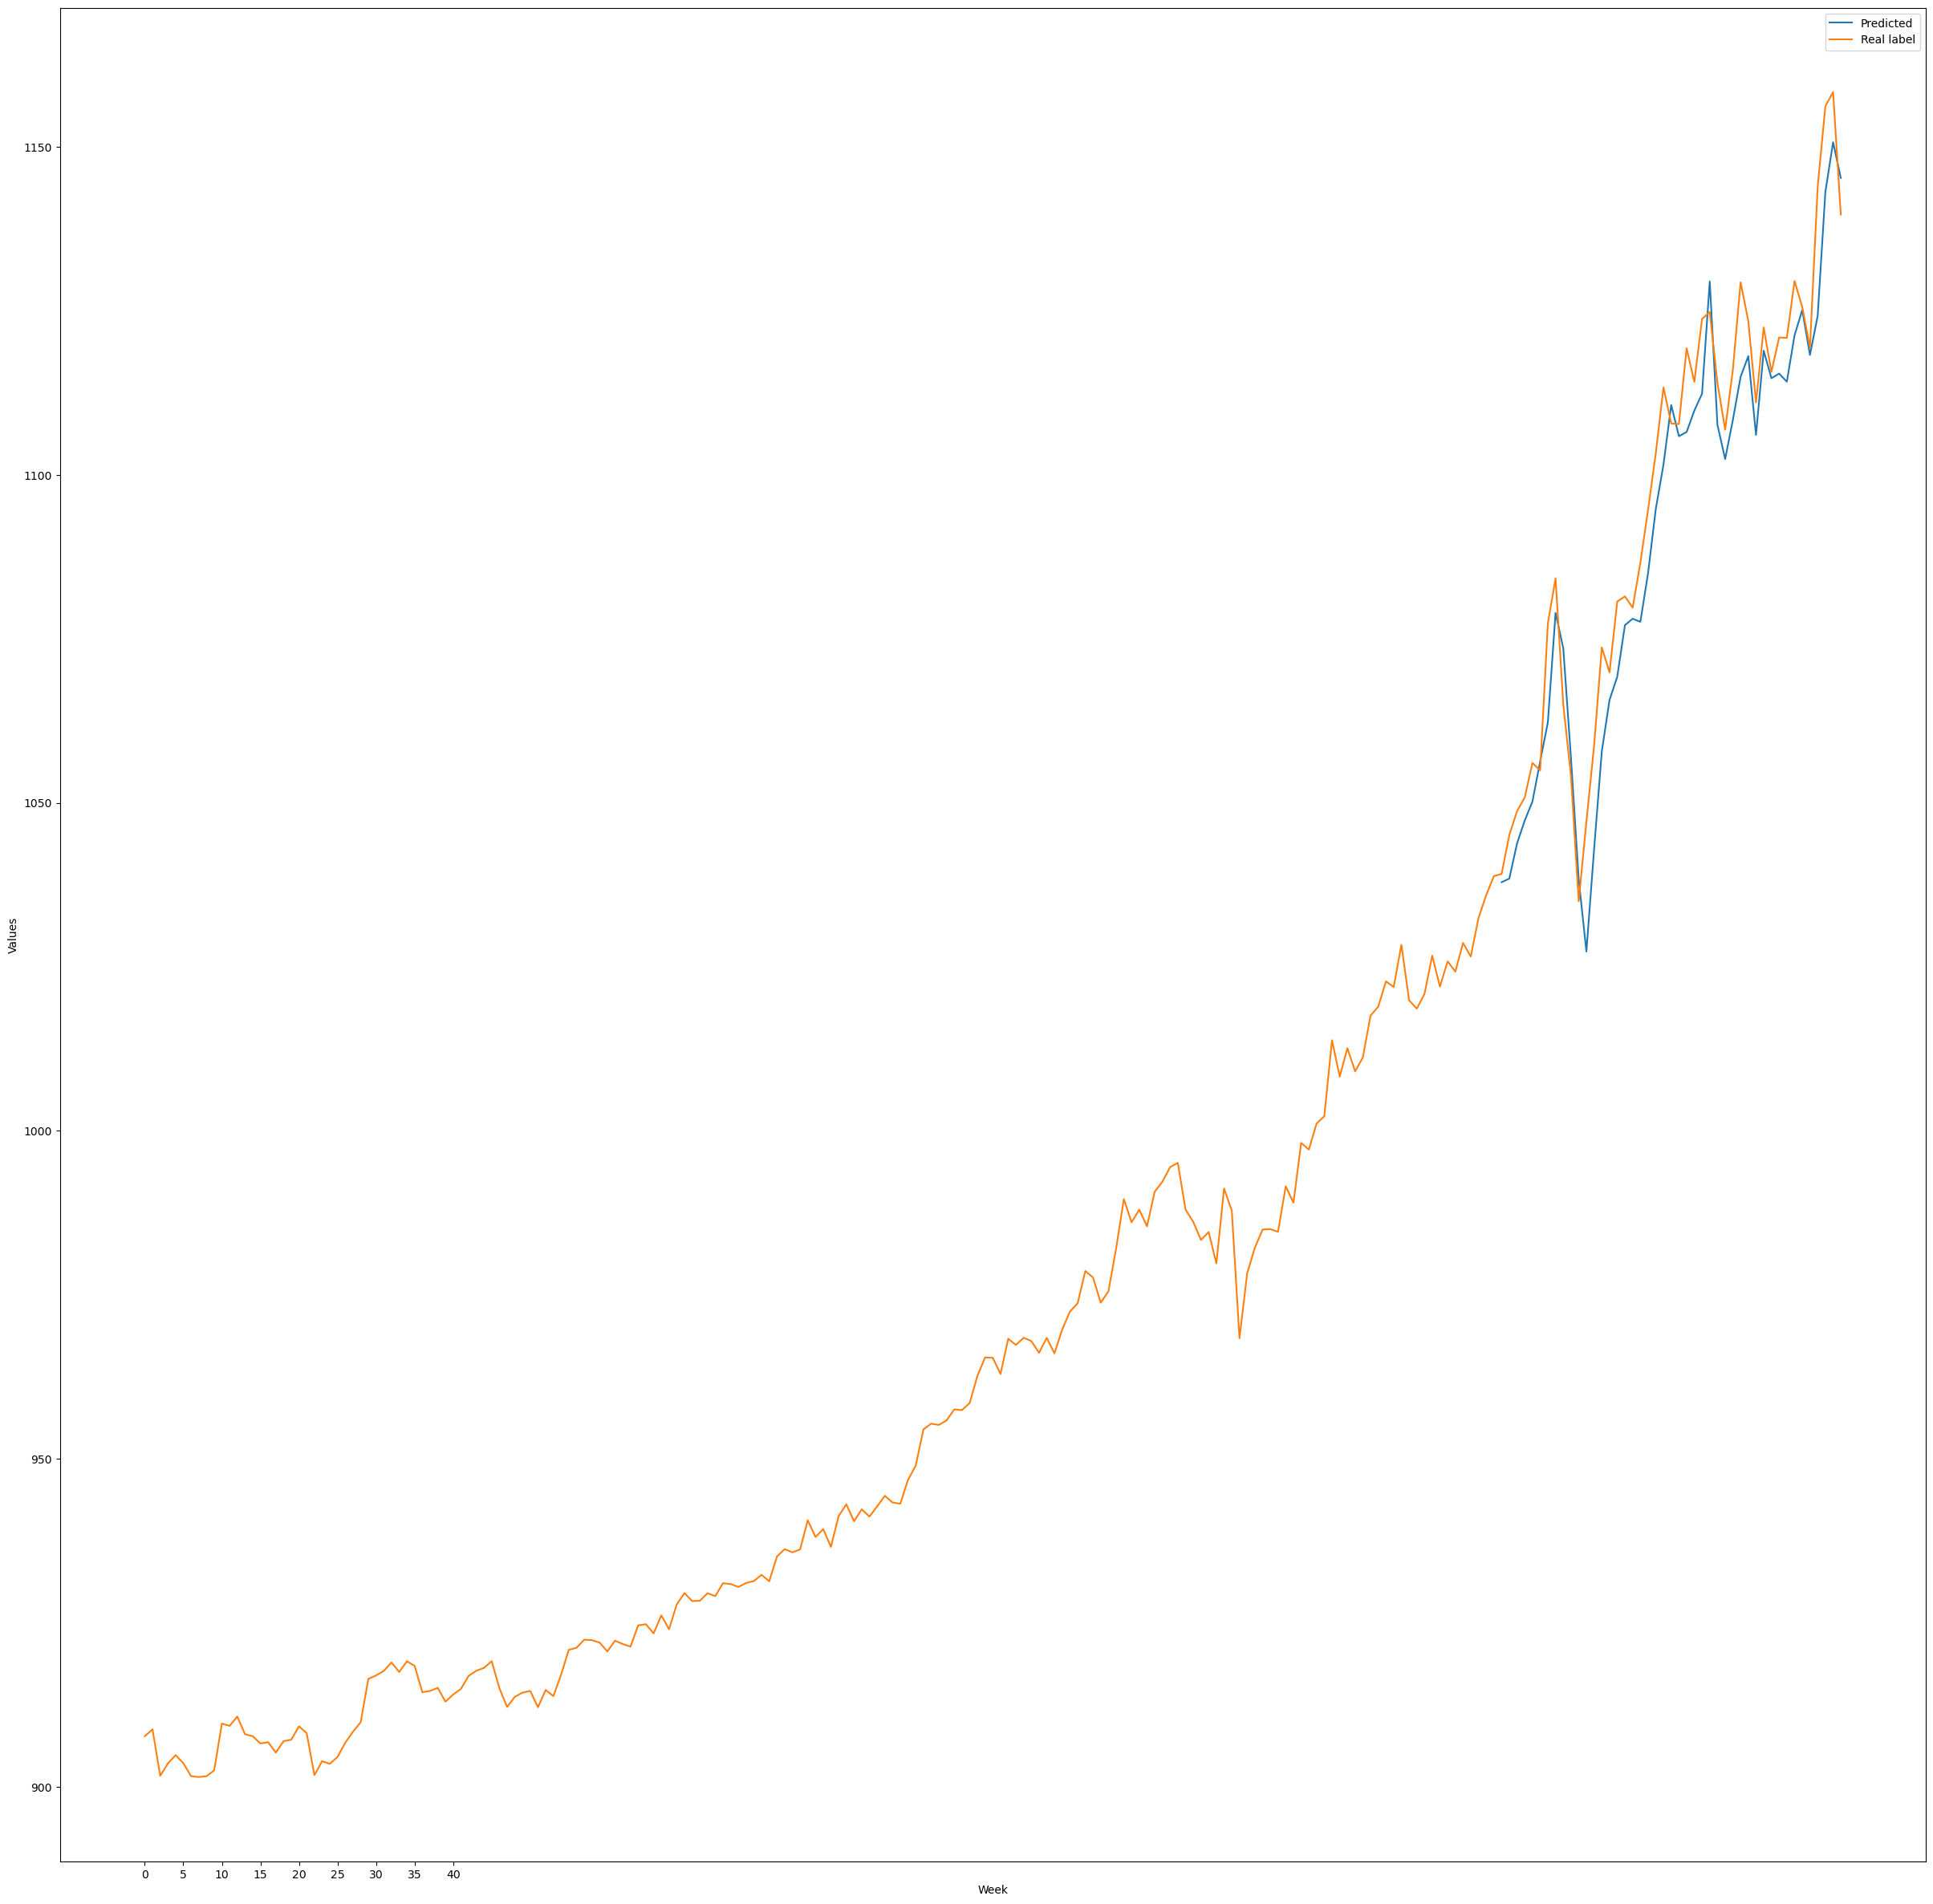

In [61]:
import math
from sklearn.metrics import mean_squared_error

#make predictions for all
allPredict = model.predict(X)
print(len(allPredict))
#invert predictions
allPredict = scaler.inverse_transform(allPredict)
allY = scaler.inverse_transform(Y)

#calculate root mean squared error for all dataset
allScore=0
for i in range (Y.shape[0]):
    allScore += math.sqrt(mean_squared_error(allPredict[i], allY[i]))
allScore=allScore/Y.shape[0]

#MSE score(sai số trên tổng thể dữ liệu nha)
print('Average All dataset Difference: %.2f ' % (allScore))

new1 = []
for i in range(176,221):
  new1.append(i)
new1 = np.array(new1)
plt.figure(figsize=(30,30))
plt.plot(new1,allPredict[176:], label = 'Predicted')
plt.plot(allY, label = 'Real label')
plt.xticks(np.arange(0, 45, 5))

plt.ylabel("Values")
plt.xlabel("Week")

plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rms = mean_squared_error(allPredict, allY, squared=False)
mae = mean_absolute_error(allPredict, allY)
print('MSE: ', allScore)
print("RMSE value: ", rms)
print("MAE value: ", mae)

MSE:  2.8937655518107444
RMSE value:  4.52628890734284
MAE value:  2.8937655518107444
